In [80]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

Simulation finished (time) 0.12610010000207694
Simulation finished (time) 1.3174318000019412
Simulation finished (time) 2.5168687000041245
Simulation finished (time) 3.390845599999011
Simulation finished (time) 4.5090368000019225
Simulation finished (time) 5.435398200002965
Simulation finished (time) 6.44688909999968
Simulation finished (time) 7.396452200002386
Simulation finished (time) 8.542167500003416
Simulation finished (time) 9.637991300005524


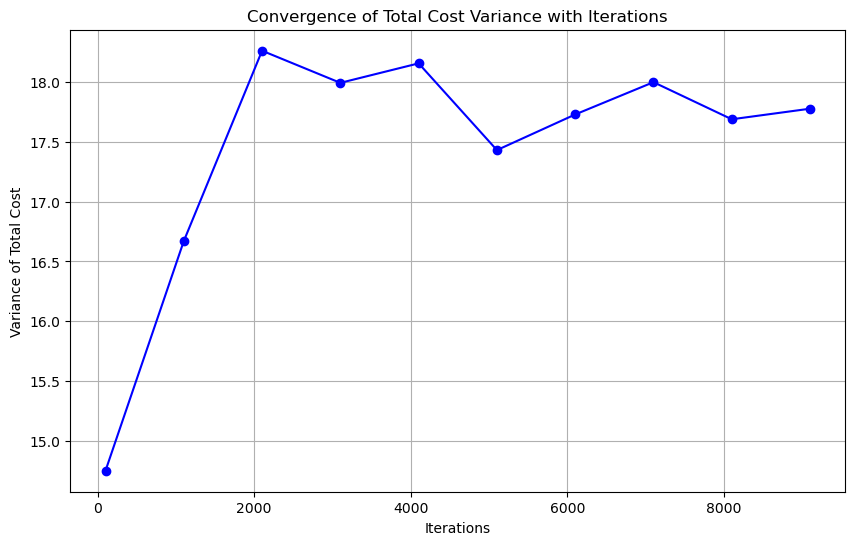

In [82]:
out = pd.DataFrame()  # Donde iran los resultados de todas las simulaciones

# Data: "todos estos datos son ficticios"
# Para simplificar la explicación se pone todo en un diccionario
# en lugar de leerlo desde un archivo input

data = {
    "wind": {"0.1": {"triangular": [30, 50, 100]}},
    "solarpv": {"0.15": {"triangular": [10, 40, 70]}},
    "solarconc": {"0.05": {"triangular": [50, 70, 120]}},
    "hydro": {"0.2": {"uniform": [10, 40]}},
    "coal": {"0.2": {"triangular": [30, 50, 100]}},
    "gas": {"0.3": {"uniform": [50, 50]}},
}

max_iterations = 10000
def main():
    iterations_range = range(100, max_iterations + 1, 500)
    variances = []
    
    for iterations in iterations_range:
        initialize(iterations)
        variance = out["total_cost"].var()
        variances.append(variance)
    
    plot_convergence(iterations_range, variances)


def initialize(iterations):
    start_time = time.perf_counter()
    for i in range(iterations):
        source_cost = {}
        total_cost = 0
        for source, item in data.items():
            source_cost = calculte_cost(item)
            total_cost += source_cost
            label = source + "_cost"
            out.loc[i, label] = source_cost
        label = "total_cost"
        out.loc[i, label] = total_cost
    finish()
    finish_time = time.perf_counter() - start_time
    print("Simulation finished (time)", finish_time)


def finish():
    out.fillna(0, inplace=True)
    out.to_csv("output.csv", sep=";")


def calculte_cost(dict):
    """Calcula la fracción del costo
    por unidad de generación"""
    unit_cost = 0
    for share, values in dict.items():
        for distr, param in values.items():
            if distr.lower() == "triangular":
                x = np.random.random()
                a = param[0]
                b = param[1]
                c = param[2]
                unit_cost = triangular(x, a, b, c)
            elif distr.lower() == "uniform":
                x = np.random.random()
                a = param[0]
                b = param[1]
                unit_cost = uniform(x, a, b)
            elif distr.lower() == "normal": 
                mu = param[0] 
                sigma = param[1]  
                x = np.random.normal(mu, sigma) 
                unit_cost = normal(x, mu, sigma) * float(share)
                
    return unit_cost * float(share)


# Métodos de distribución
def uniform(x, low, high):
    """x = random number"""
    value = low + (high - low) * x
    return value


def triangular(x, a, b, c):
    """x = random number"""
    k = (b - a) / (c - a)
    if x < k:
        value = a + (x * (c - a) * (b - a)) ** (0.5)
    else:
        value = c - ((1 - x) * (c - a) * (c - b)) ** (0.5)
    return value


def normal(x, mu, sigma):
   """Returns a value from a normal distribution"""
   return np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

def plot_convergence(iterations_range, variances):
    plt.figure(figsize=(10, 6))
    plt.plot(iterations_range, variances, marker='o', linestyle='-', color='b')
    plt.title('Convergence of Total Cost Variance with Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Variance of Total Cost')
    plt.grid(True)
    plt.show()
    

if __name__ == "__main__":
    main()


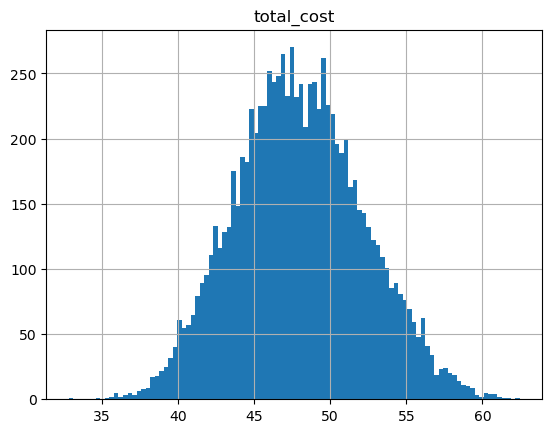

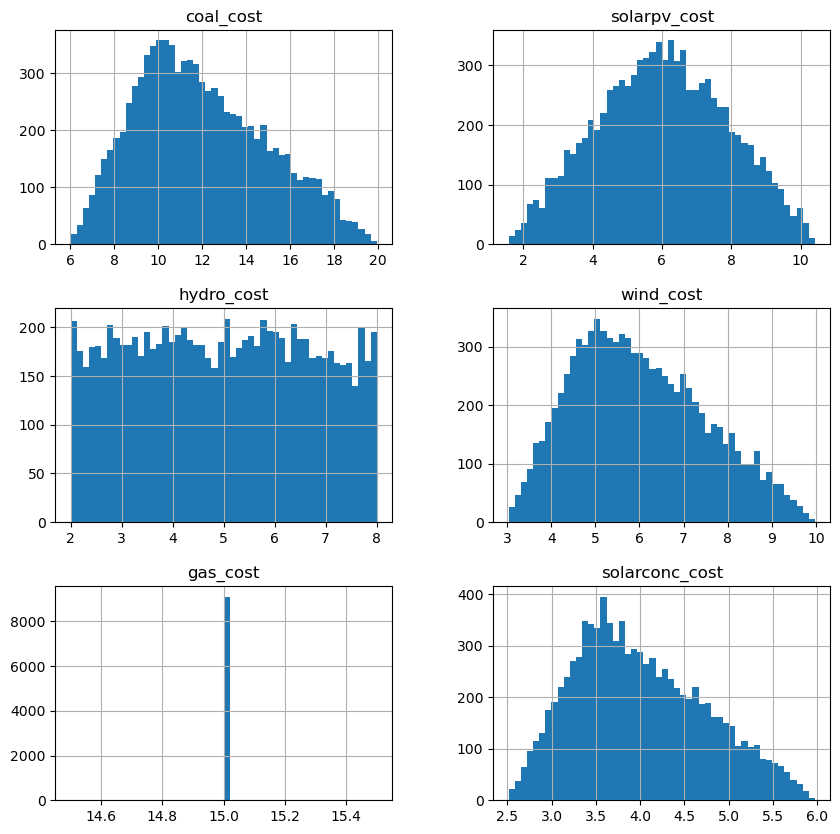

In [83]:
total_cost = out["total_cost"].std()
general_std = out.std()

hist = out.hist("total_cost", bins=100)
hist = out.hist(
    column=[
        "coal_cost",
        "solarpv_cost",
        "hydro_cost",
        "wind_cost",
        "gas_cost",
        "solarconc_cost",
    ],
    bins=50,
    figsize=(10, 10),
)

In [84]:
print(general_std)

wind_cost         1.480351
solarpv_cost      1.857830
solarconc_cost    0.737783
hydro_cost        1.716460
coal_cost         2.951109
gas_cost          0.000000
total_cost        4.216253
dtype: float64


In [85]:
confidence_interval = np.percentile(out["total_cost"], [10, 90])
print(f"{confidence_interval}")

[42.52695133 53.58333836]


In [86]:
datos = out.describe()
datos

,wind_cost,solarpv_cost,solarconc_cost,hydro_cost,coal_cost,gas_cost,total_cost
count,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.0,9100.000000
mean,6.000706,6.021825,3.997628,4.969675,11.990052,15.0,47.979887
std,1.480351,1.857830,0.737783,1.716460,2.951109,0.0,4.216253
min,3.030390,1.579324,2.512755,2.000286,6.013879,15.0,32.835457
25%,4.847388,4.668844,3.427507,3.494085,9.720056,15.0,45.042206
50%,5.833811,6.011334,3.900026,4.980982,11.597060,15.0,47.848161
75%,7.051095,7.378755,4.525385,6.424077,14.088980,15.0,50.810401
max,9.979362,10.412278,5.974528,7.999967,19.951179,15.0,62.453374


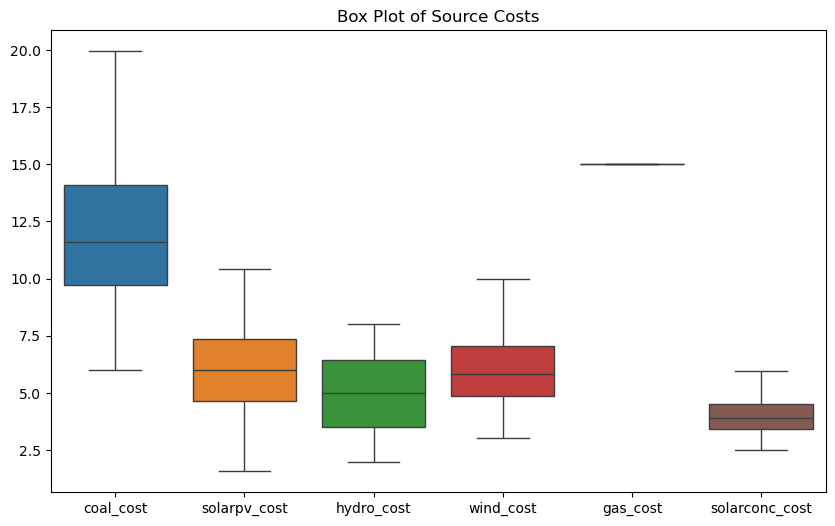

In [87]:
import seaborn as sns
 # Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=out[["coal_cost", "solarpv_cost", "hydro_cost", "wind_cost", "gas_cost", "solarconc_cost"]])
plt.title('Box Plot of Source Costs')
plt.show()

C:\Users\stcra\AppData\Local\Temp\ipykernel_30632\1022037927.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(out[column], label=column)


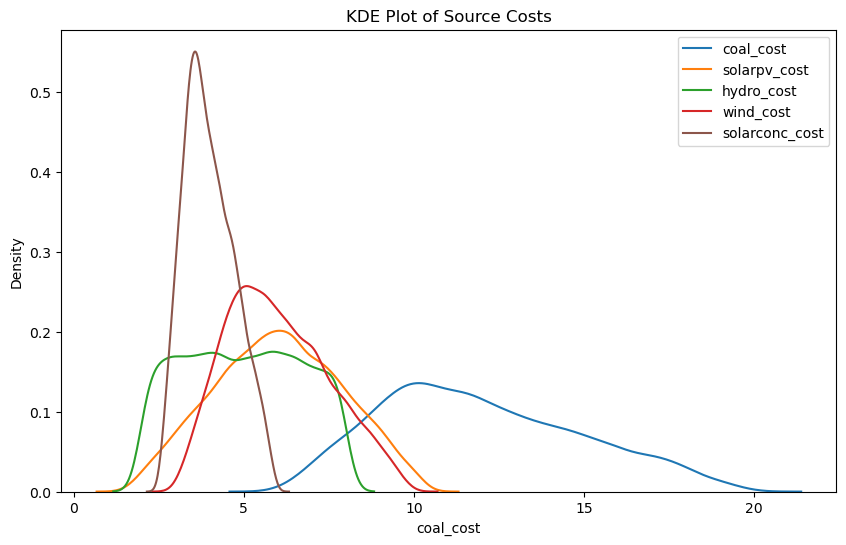

In [88]:
plt.figure(figsize=(10, 6))
for column in ["coal_cost", "solarpv_cost", "hydro_cost", "wind_cost", "gas_cost", "solarconc_cost"]:
    sns.kdeplot(out[column], label=column)
plt.title('KDE Plot of Source Costs')
plt.legend()
plt.show()